#  Question 2

In [17]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
movies = pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [85]:
movies_1 = movies.iloc[:,6:15]
movies_1

,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,1,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0
7,1,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,1,0,1


In [86]:
movies_1.describe()

,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Visualization of input dataset 

<AxesSubplot:ylabel='Count'>

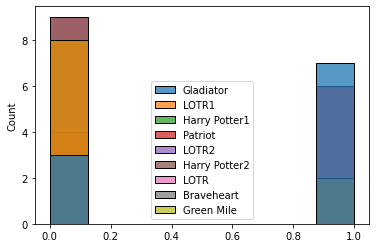

In [87]:
sns.histplot(data=movies_1)

<AxesSubplot:>

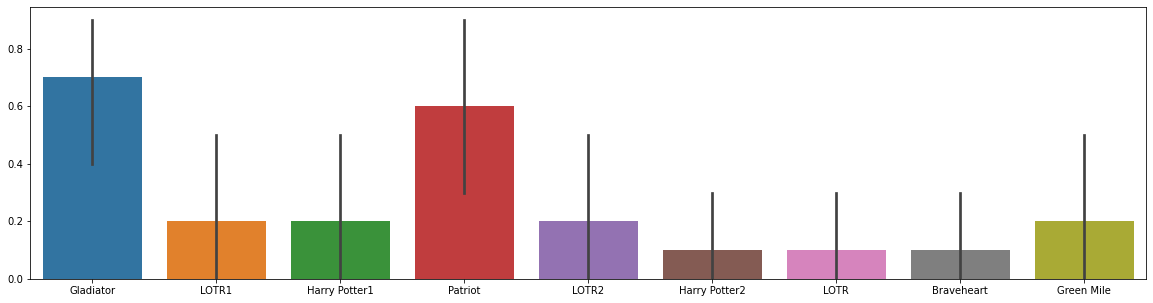

In [88]:
plt.figure(figsize= (20,5))
sns.barplot(data=movies_1)

##   Apriori Algorithm 1

In [89]:
movies_1_freq = apriori(movies_1, min_support=0.1, use_colnames=True,max_len= 5)
movies_1_freq

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.1,(Harry Potter2)
6,0.1,(LOTR)
7,0.1,(Braveheart)
8,0.2,(Green Mile)
9,0.6,"(Gladiator, Patriot)"


##  Association rule

In [90]:
movies_1_rule = association_rules(movies_1_freq, metric="lift", min_threshold=0.6)
movies_1_rule
movies_1_rule.sort_values('lift',ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
71,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
67,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
70,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
66,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
34,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
42,(LOTR1),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
39,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
43,(LOTR2),"(Harry Potter1, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
44,"(Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf


## Inference 

###  The first rule states that LOTR and (Gladiator,Green Mile) are viewed frequently. The support for LOTR is 0.1. The confidence for this rule is 1.0 which means that out of all the movies containing LOTR, 100% of the movies are likely to contain (Gladiator,Green Mile) as well. Finally, lift of 10.0 shows that the (Gladiator,Green Mile) are 10.0 more likely to be watched by the viewers who watch LOTR, compared to its other movies.

###  The second rule states that (LOTR2,Green Mile) and (Harry Potter1,LOTR1) are viewed frequently. The support for LOTR is 0.1. The confidence for this rule is 1.0 which means that out of all the movies containing (LOTR2,Green Mile), 100% of the movies are likely to contain (Harry Potter1,LOTR1) as well. Finally, lift of 10.0 shows that the (Harry Potter1,LOTR1) are 10.0 more likely to be watched by the viewers who watch (LOTR2,Green Mile), compared to its other movies.

##  Visualization of association rule 

###  support vs confidence 

Text(0.5, 1.0, 'support vs confidence')

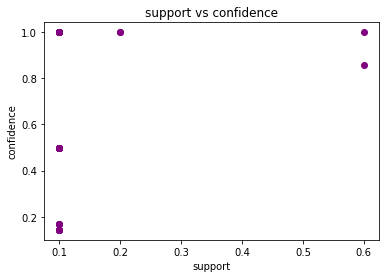

In [91]:
plt.scatter(x= movies_1_rule.support, y=movies_1_rule.confidence,c="purple" )
plt.xlabel("support")
plt.ylabel("confidence")
plt.title("support vs confidence")

###  support vs lift

Text(0.5, 1.0, 'support vs lift')

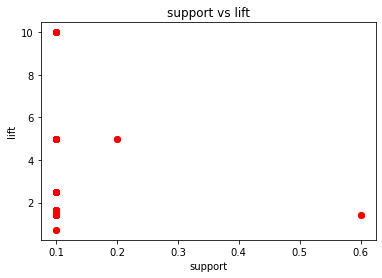

In [92]:
plt.scatter(x= movies_1_rule.support, y=movies_1_rule.lift,c="red" )
plt.xlabel("support")
plt.ylabel("lift")
plt.title("support vs lift")

###  confidence vs lift 

Text(0.5, 1.0, 'confidence vs lift')

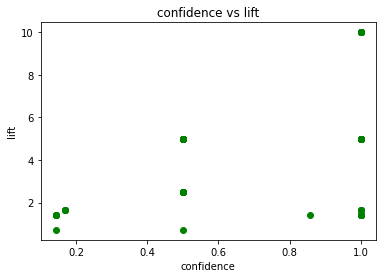

In [93]:
plt.scatter(x= movies_1_rule.confidence , y=movies_1_rule.lift,c="green" )
plt.xlabel("confidence")
plt.ylabel("lift")
plt.title("confidence vs lift")

###  support vs confidence vs lift

Text(0.5, 1.0, 'support vs confidence vs lift')

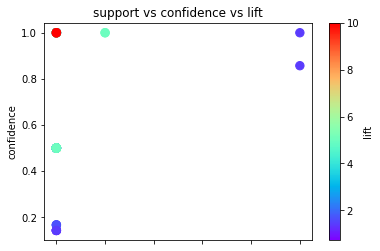

In [94]:
movies_1_rule.plot(x="support",y ="confidence",c="lift",kind="scatter",s=70 ,cmap="rainbow") 
plt.title('support vs confidence vs lift')

<AxesSubplot:xlabel='support', ylabel='confidence'>

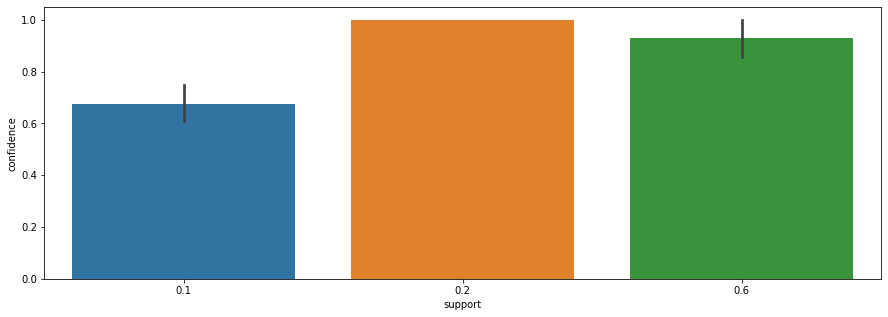

In [95]:
plt.figure(figsize= (15,5))
sns.barplot(data=movies_1_rule, x="support", y="confidence")

##   Apriori Algorithm 2

In [96]:
movies_1_freq2 = apriori(movies_1, min_support=0.2, use_colnames=True, max_len=3)
movies_1_freq2

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.2,(Green Mile)
6,0.6,"(Gladiator, Patriot)"
7,0.2,"(LOTR1, LOTR2)"


##  Association rule

In [97]:
movies_1_rule2 = association_rules(movies_1_freq2, metric="confidence",min_threshold=0.8 )
movies_1_rule2.sort_values("lift", ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


## Inference 

###  The first rule states that LOTR1 and LOTR2 are viewed frequently. The support for LOTR1 is 0.2. The confidence for this rule is 1.0 which means that out of all the movies containing LOTR1, 100% of the movies are likely to contain LOTR2 as well. Finally, lift of 5.0 shows that the LOTR2 are 5.0 more likely to be watched by the viewers who watch LOTR1, compared to its other movies.

##  Visualization of association rule 

###  support vs confidence 

Text(0.5, 1.0, 'confidence vs support')

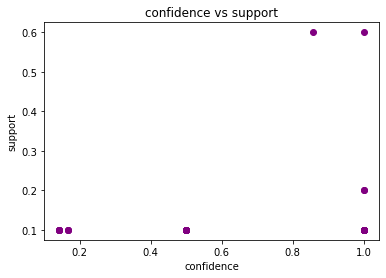

In [98]:
plt.scatter(y= movies_1_rule.support, x=movies_1_rule.confidence,c="purple" )
plt.ylabel("support")
plt.xlabel("confidence")
plt.title("confidence vs support")

###  confidence vs lift 

Text(0.5, 1.0, 'confidence vs lift')

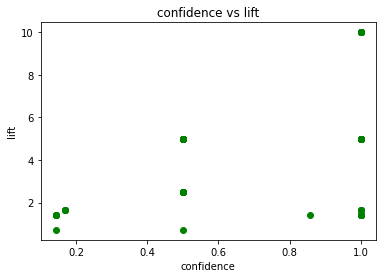

In [99]:
plt.scatter(x= movies_1_rule.confidence , y=movies_1_rule.lift,c="green" )
plt.xlabel("confidence")
plt.ylabel("lift")
plt.title("confidence vs lift")

###  support vs lift

Text(0.5, 1.0, 'support vs lift')

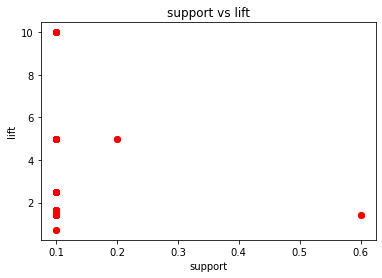

In [100]:
plt.scatter(x=movies_1_rule.support, y=movies_1_rule.lift,c="red" )
plt.xlabel("support")
plt.ylabel("lift")
plt.title("support vs lift")

###  support vs lift vs confidence 

Text(0.5, 1.0, 'support vs lift vs confidence')

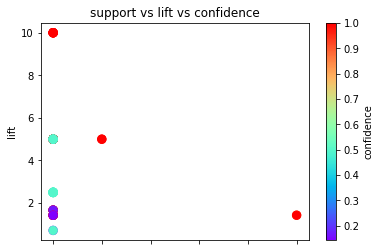

In [101]:
movies_1_rule.plot(x="support",y ="lift",c="confidence",kind="scatter",s=70 ,cmap="rainbow") 
plt.title('support vs lift vs confidence')